### Problem statement – to estimate delivery time for each order based on various parameters. So that customers are well informed, thus achieving better CSAT

In [187]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Step1 - EDA

In [188]:
data = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documents\Datasets\porterDataset.csv')
df = pd.DataFrame(data)
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [189]:
df.shape

(197428, 14)

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [191]:
df.isna().sum()

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

In [192]:
df.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,196441.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
mean,2.978706,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065
std,1.524867,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,4.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000
max,6.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000


In [193]:
df.describe(include='object')

,created_at,actual_delivery_time,store_id,store_primary_category
count,197428,197421,197428,192668
unique,180985,178110,6743,74
top,2015-01-24 01:56:33,2015-02-08 04:09:25,d43ab110ab2489d6b9b2caa394bf920f,american
freq,6,5,937,19399


### Step2 - Data Preprocessing and Feature Engineering 

Handling missing, zero, negative, invalid, NA values in dataset

In [194]:
df['market_id'].value_counts()                  # understanding which values of 'market_id' col are taken so as to fill blanks aptly

market_id
2.0    55058
4.0    47599
1.0    38037
3.0    23297
5.0    18000
6.0    14450
Name: count, dtype: int64

In [195]:
# filling blanks of 'market_id' with value 10 which is not used prev
df['market_id'] = df['market_id'].fillna(10)
df['market_id'].value_counts()

market_id
2.0     55058
4.0     47599
1.0     38037
3.0     23297
5.0     18000
6.0     14450
10.0      987
Name: count, dtype: int64

In [196]:
# checking unique values of 'store_primary_category'
df['store_primary_category'].unique()

array(['american', 'mexican', nan, 'indian', 'italian', 'sandwich',
       'thai', 'cafe', 'salad', 'pizza', 'chinese', 'singaporean',
       'burger', 'breakfast', 'mediterranean', 'japanese', 'greek',
       'catering', 'filipino', 'convenience-store', 'other', 'korean',
       'vegan', 'asian', 'barbecue', 'fast', 'dessert', 'smoothie',
       'seafood', 'vietnamese', 'cajun', 'steak', 'middle-eastern',
       'soup', 'vegetarian', 'persian', 'nepalese', 'sushi',
       'latin-american', 'hawaiian', 'chocolate', 'burmese', 'british',
       'pasta', 'alcohol', 'dim-sum', 'peruvian', 'turkish', 'malaysian',
       'ethiopian', 'afghan', 'bubble-tea', 'german', 'french',
       'caribbean', 'gluten-free', 'comfort-food', 'gastropub',
       'pakistani', 'moroccan', 'spanish', 'southern', 'tapas', 'russian',
       'brazilian', 'european', 'cheese', 'african', 'argentine',
       'kosher', 'irish', 'lebanese', 'belgian', 'indonesian',
       'alcohol-plus-food'], dtype=object)

In [197]:
# filling blanks of 'store_primary_category' with value 'mixed'
df['store_primary_category'].fillna('mixed',inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20140\3966762841.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['store_primary_category'].fillna('mixed',inplace=True)


In [198]:
# checking unique values of 'order_protocol'
df['order_protocol'].unique()

array([ 1.,  2.,  3.,  4., nan,  5.,  6.,  7.])

In [199]:
df['order_protocol'].fillna(-1, inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20140\2960461191.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['order_protocol'].fillna(-1, inplace=True)


In [200]:
df['total_onshift_partners'].unique()

array([ 33.,   1.,   6.,   2.,  10.,   7.,   8.,   3.,  16.,   5.,   4.,
        24.,  12.,  19.,  21.,  22.,  27.,  13.,  18., 117., 130., 121.,
        94.,  34.,  17.,  38.,  20.,  15.,  39.,  26.,  30.,  35.,  11.,
        14.,  32.,  29.,  25.,  23.,  61.,  41.,  58.,  51.,  57.,  60.,
         9., 108.,  72.,  89., 112.,  55., 126.,  80.,  69., 125., 113.,
       105.,  98.,  86.,  90.,  87.,  74.,  84.,  91.,  96., 123., 101.,
       119.,  nan, 129.,  66.,  81.,  36.,  75.,  43.,  70.,  65.,  77.,
       114.,  62., 116., 102.,  76.,  67.,  64.,  88.,  73.,  63.,  46.,
        28.,  47., 110.,  97.,  42.,  79.,  49.,  50.,  37.,  92., 103.,
        44.,  68.,  56.,   0., 107.,  78.,  71., 128., 104.,  45.,  31.,
       100.,  40.,  53., 115., 109.,  99.,  85.,  59., 118.,  54.,  52.,
        48., 132., 127., 133., 131., 149.,  93., 111.,  95.,  82., 136.,
       120., 134., 124., 106., 137.,  83., 152., 147., 144., 150., 145.,
       122., 155., 135., 151., 140., 141., 143., 13

In [201]:
for val in df['total_onshift_partners']:                                       # capping -ve values to 0 as person count cannot be negative
    if val < 0:
        df['total_onshift_partners'].replace(val,0,inplace=True)
df['total_onshift_partners'].fillna(df['total_onshift_partners'].median(), inplace=True)
df['total_onshift_partners'].unique()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20140\1771854926.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_onshift_partners'].replace(val,0,inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20140\1771854926.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

array([ 33.,   1.,   6.,   2.,  10.,   7.,   8.,   3.,  16.,   5.,   4.,
        24.,  12.,  19.,  21.,  22.,  27.,  13.,  18., 117., 130., 121.,
        94.,  34.,  17.,  38.,  20.,  15.,  39.,  26.,  30.,  35.,  11.,
        14.,  32.,  29.,  25.,  23.,  61.,  41.,  58.,  51.,  57.,  60.,
         9., 108.,  72.,  89., 112.,  55., 126.,  80.,  69., 125., 113.,
       105.,  98.,  86.,  90.,  87.,  74.,  84.,  91.,  96., 123., 101.,
       119.,  37., 129.,  66.,  81.,  36.,  75.,  43.,  70.,  65.,  77.,
       114.,  62., 116., 102.,  76.,  67.,  64.,  88.,  73.,  63.,  46.,
        28.,  47., 110.,  97.,  42.,  79.,  49.,  50.,  92., 103.,  44.,
        68.,  56.,   0., 107.,  78.,  71., 128., 104.,  45.,  31., 100.,
        40.,  53., 115., 109.,  99.,  85.,  59., 118.,  54.,  52.,  48.,
       132., 127., 133., 131., 149.,  93., 111.,  95.,  82., 136., 120.,
       134., 124., 106., 137.,  83., 152., 147., 144., 150., 145., 122.,
       155., 135., 151., 140., 141., 143., 138., 13

In [202]:
for val in df['total_busy_partners']:                                       # capping -ve values to 0 as person count cannot be negative
    if val < 0:
        df['total_busy_partners'].replace(val,0,inplace=True)
df['total_busy_partners'].fillna(df['total_busy_partners'].median(), inplace=True)
df['total_busy_partners'].unique()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20140\2285569384.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_busy_partners'].replace(val,0,inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20140\2285569384.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



array([ 14.,   2.,   0.,   1.,   6.,   9.,   8.,   3.,   5.,   4.,  24.,
        13.,  19.,  17.,  11.,  21.,  25.,  16.,  18.,  12., 112., 129.,
       119.,  92.,  30.,  15.,  33.,  22.,  37.,  29.,  23.,  31.,  34.,
        20.,  62.,  28.,  44.,  39.,  32.,  53.,  52.,  59.,  57.,   7.,
        10., 100.,  72.,  81., 106.,  84., 122., 109.,  54.,  89., 103.,
        91.,  83.,  75., 107., 102.,  38.,  96.,  80.,  94.,  64., 117.,
       125., 110., 128.,  27.,  35.,  70.,  74.,  60.,  73.,  40.,  97.,
        77.,  61.,  58., 116., 123.,  42.,  26.,  95.,  68., 108.,  55.,
        78.,  67.,  69.,  99.,  45.,  63.,  71.,  50.,  48.,  41.,  66.,
       127.,  79.,  85.,  88.,  98., 118.,  90.,  36., 121.,  65.,  47.,
        49.,  43.,  46.,  93., 132., 104., 114., 124.,  56.,  51.,  76.,
       101., 130.,  86., 138., 136.,  82.,  87., 143., 120., 146., 131.,
       113., 115., 148., 105., 126., 141., 111., 135., 137., 153., 133.,
       145., 139., 134., 142., 150., 144., 154., 14

In [203]:
# checking uniques of 'total_outstanding_orders'
df['total_outstanding_orders'].unique()

array([ 21.,   2.,   0.,   9.,   7.,  18.,   1.,   4.,   3.,   8.,  12.,
        26.,  11.,  30.,  16.,  39.,  24.,  27.,  20.,  13., 178., 230.,
       205., 149.,  28.,  15.,  42.,  43.,  33.,   5.,  37.,  46.,  36.,
        14.,  29.,  32.,  72.,  41.,  54.,  49.,  23.,  56.,  60.,  10.,
         6., 154., 144.,  34., 100., 173.,  80., 202., 124., 130., 181.,
       188., 148., 150., 127., 160., 107., 123., 159., 186., 143., 190.,
       171.,  nan, 261., 132.,  67., 120., 158.,  59.,  38.,  47.,  68.,
        92.,  99., 175., 102., 184., 121.,  17.,  96., 111.,  22., 131.,
       141.,  89.,  48.,  65., 194.,  73.,  45., 203., 134., 126., 183.,
        64., 167.,  31., 153., 119.,  75.,  95.,  52., 118., 191.,  61.,
       106.,  19.,  58., 152., 101.,  35., 151.,  83., 179.,  97.,  44.,
        25., 147., 169., 135., 142., 165., 172.,  91.,  40., 237., 198.,
       220., 219.,  78.,  90., 138., 168.,  85.,  81., 212., 192., 137.,
       189.,  51.,  74.,  62.,  63.,  50., 122.,  9

In [204]:
df['total_outstanding_orders'].fillna(0, inplace=True)
for val in df['total_outstanding_orders']:
    if val < 0:
        df['total_outstanding_orders'].replace(val,0,inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20140\2977110081.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_outstanding_orders'].fillna(0, inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20140\2977110081.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [205]:
# checking for duplicate values
df[df.duplicated()].shape

(0, 14)

In [206]:
df[df.duplicated()]                                             # displaying duplicate rows 

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders


In [207]:
# converting incorrect datatypes to correct types
df['market_id'] = df['market_id'].astype('int64')

In [208]:
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])             # converting date columns from object to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])

In [209]:
# FeatureEngineering - adding a new column for primary_key (as none of the current cols qulify for pk)

df['primary_key_col'] = df['store_id']+df['store_primary_category']
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,primary_key_col
0,1,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,df263d996281d984952c07998dc54358american
1,2,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,f0ade77b43923b38237db569b016ba25mexican
2,3,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,mixed,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,f0ade77b43923b38237db569b016ba25mixed
3,3,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,mixed,1.0,6,6900,5,600,1800,1.0,1.0,2.0,f0ade77b43923b38237db569b016ba25mixed
4,3,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,mixed,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,f0ade77b43923b38237db569b016ba25mixed


In [210]:
# backward filling the date columns
df['actual_delivery_time'].bfill(inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20140\2729202474.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['actual_delivery_time'].bfill(inplace=True)


In [211]:
# FeatureEngineering - adding new col to understand delivery time
df['delivery_time'] = df['actual_delivery_time']-df['created_at']
# df['delivery_time'] = pd.to_datetime(df['delivery_time'])
mean_time = df['delivery_time'].min() + (df['delivery_time'] - df['delivery_time'].min()).mean()
print(mean_time)

0 days 00:48:04.084253500


In [212]:
df['Days_for_delivery'] = df['delivery_time'].dt.days
df['delivery_time'] = df['delivery_time'] - pd.to_timedelta(df['Days_for_delivery'], unit='D')

def format_timedelta_to_hms(td):
    total_seconds = int(td.total_seconds())
    # Use built-in Python string formatting for time
    return '{:02}:{:02}:{:02}'.format(
        total_seconds // 3600,
        (total_seconds % 3600) // 60,
        total_seconds % 60
    )

df['Time_Formatted'] = df['delivery_time'].apply(format_timedelta_to_hms)
df['week_number'] = df['created_at'].dt.isocalendar().week
df['week_number'] = df['week_number'].astype('int64')


In [213]:
# dropping the duplicates as one instance of it already exists
df.drop_duplicates(inplace=True)
df.shape

(197428, 19)

In [214]:
df.nunique()

market_id                        7
created_at                  180985
actual_delivery_time        178110
store_id                      6743
store_primary_category          75
order_protocol                   8
total_items                     57
subtotal                      8368
num_distinct_items              20
min_item_price                2312
max_item_price                2652
total_onshift_partners         168
total_busy_partners            154
total_outstanding_orders       275
primary_key_col              15435
delivery_time                 7138
Days_for_delivery               10
Time_Formatted                7138
week_number                      6
dtype: int64

In [215]:
# checking if any column has a categorical value appearing < 20 times
for col in df.columns:
    if df[col].nunique() < 20:
        print(df[col].value_counts())
        print('-'*50)

market_id
2     55058
4     47599
1     38037
3     23297
5     18000
6     14450
10      987
Name: count, dtype: int64
--------------------------------------------------
order_protocol
 1.0    54725
 3.0    53199
 5.0    44290
 2.0    24052
 4.0    19354
-1.0      995
 6.0      794
 7.0       19
Name: count, dtype: int64
--------------------------------------------------
Days_for_delivery
 0     197418
-8          2
-9          1
 98         1
 3          1
-24         1
-5          1
-6          1
 1          1
 4          1
Name: count, dtype: int64
--------------------------------------------------
week_number
7     52042
6     51188
5     45342
4     30864
8     17991
42        1
Name: count, dtype: int64
--------------------------------------------------


In [216]:
df.isnull().sum()

market_id                   0
created_at                  0
actual_delivery_time        0
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
primary_key_col             0
delivery_time               0
Days_for_delivery           0
Time_Formatted              0
week_number                 0
dtype: int64

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   market_id                 197428 non-null  int64          
 1   created_at                197428 non-null  datetime64[ns] 
 2   actual_delivery_time      197428 non-null  datetime64[ns] 
 3   store_id                  197428 non-null  object         
 4   store_primary_category    197428 non-null  object         
 5   order_protocol            197428 non-null  float64        
 6   total_items               197428 non-null  int64          
 7   subtotal                  197428 non-null  int64          
 8   num_distinct_items        197428 non-null  int64          
 9   min_item_price            197428 non-null  int64          
 10  max_item_price            197428 non-null  int64          
 11  total_onshift_partners    197428 non-null  float64  

In [219]:
df.describe()

,market_id,created_at,actual_delivery_time,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time,Days_for_delivery,week_number
count,197428.000000,197428,197428,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428,197428.000000,197428.000000
mean,3.013808,2015-02-04 22:00:09.537962752,2015-02-04 22:48:13.622216960,2.862785,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.165144,41.102422,53.269151,0 days 00:47:43.953370342,0.000233,5.903712
min,1.000000,2014-10-19 05:24:15,2015-01-21 15:58:11,-1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:01:41,-24.000000,4.000000
25%,2.000000,2015-01-29 02:32:42,2015-01-29 03:22:28,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,19.000000,17.000000,12.000000,0 days 00:35:04,0.000000,5.000000
50%,3.000000,2015-02-05 03:29:09.500000,2015-02-05 04:40:34.500000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,35.000000,0 days 00:44:20,0.000000,6.000000
75%,4.000000,2015-02-12 01:39:18.500000,2015-02-12 02:25:17.750000128,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,62.000000,59.000000,80.000000,0 days 00:56:21,0.000000,7.000000
max,10.000000,2015-02-18 06:00:44,2015-02-19 22:45:31,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,0 days 23:51:15,98.000000,42.000000
std,1.599632,NaN,NaN,1.524963,2.666546,1823.093688,1.630255,522.038648,558.411377,33.143570,30.866536,52.910043,0 days 00:20:36.127728206,0.230353,1.216714


In [220]:
df['Days_for_delivery'].unique()

array([  0,  -9,  98,  -8,   3, -24,  -5,  -6,   1,   4])

### EDA by visualizations

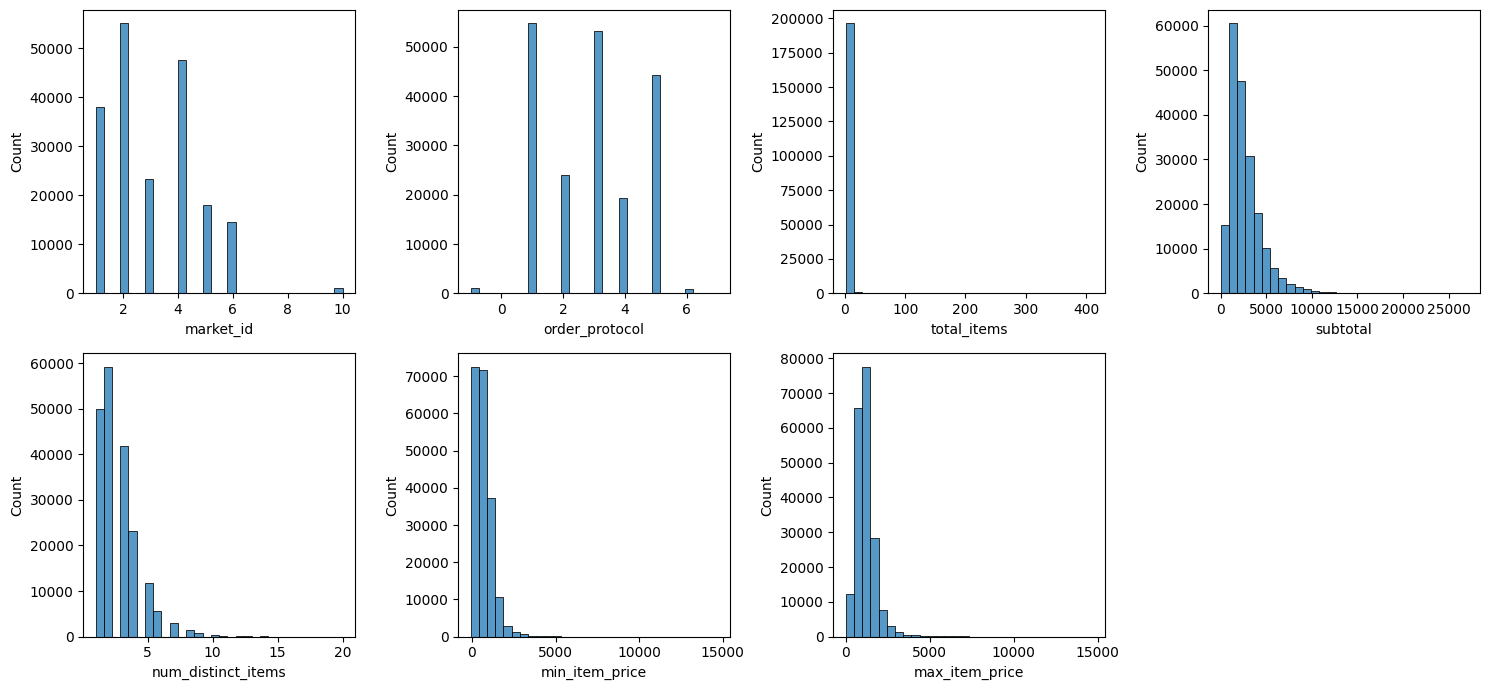

In [185]:
# numerical_cols = df.select_dtypes(include=np.number).columns
numerical_cols = df[['market_id','order_protocol','total_items','subtotal','num_distinct_items','min_item_price','max_item_price']]
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3,4,i+1)
    sns.histplot(df[col], bins=30)
plt.tight_layout()
plt.show()

- the columns of 'market_id','total_items','subtotal','num_distinct_items','min_item_price','max_item_price' have significant outliers, which can be filtered out for analysis

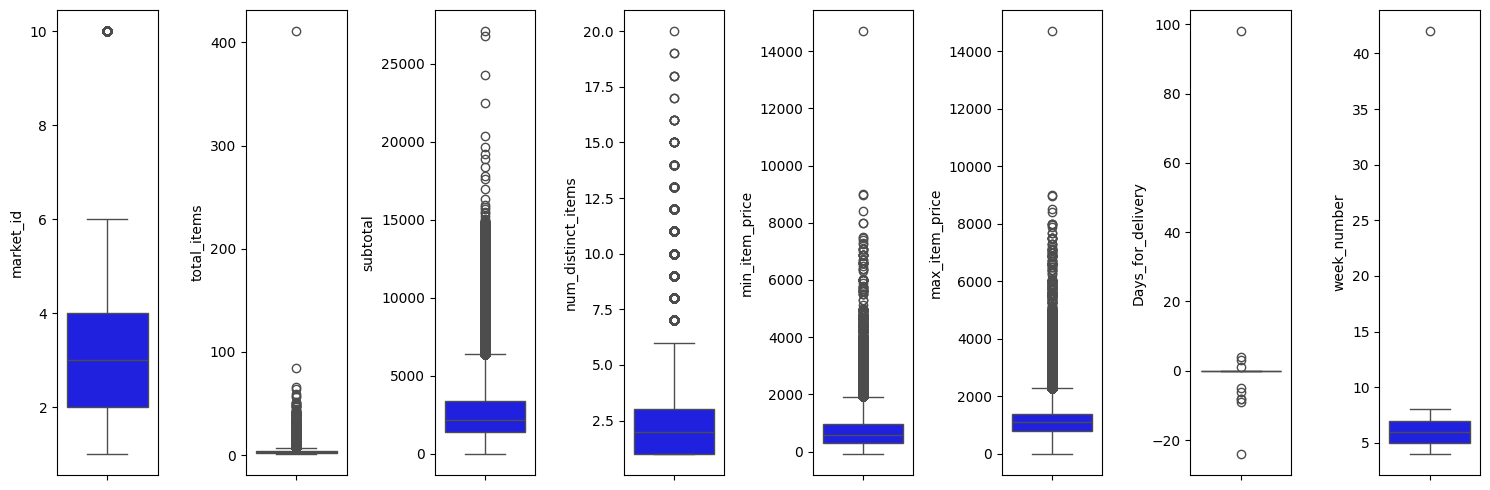

In [186]:
cols = df[['market_id','total_items','subtotal','num_distinct_items','min_item_price','max_item_price','Days_for_delivery','week_number']]
plt.figure(figsize=(15,5))
for i, col in enumerate(cols, 1):
    plt.subplot(1,8,i)
    sns.boxplot(y=df[col], color='blue')
    
plt.tight_layout()
plt.show()

In [223]:
from scipy import stats

z_scores = np.abs(stats.zscore(df[['market_id','total_items','subtotal','num_distinct_items','min_item_price','max_item_price','total_onshift_partners','total_busy_partners','total_outstanding_orders','Days_for_delivery','week_number']]))          # cols from which outliers need to be removed. converting -ve to +ve
df_clean = df[~(z_scores>3).any(axis=1)]                        # keeping only records 3 std deviations away from mean

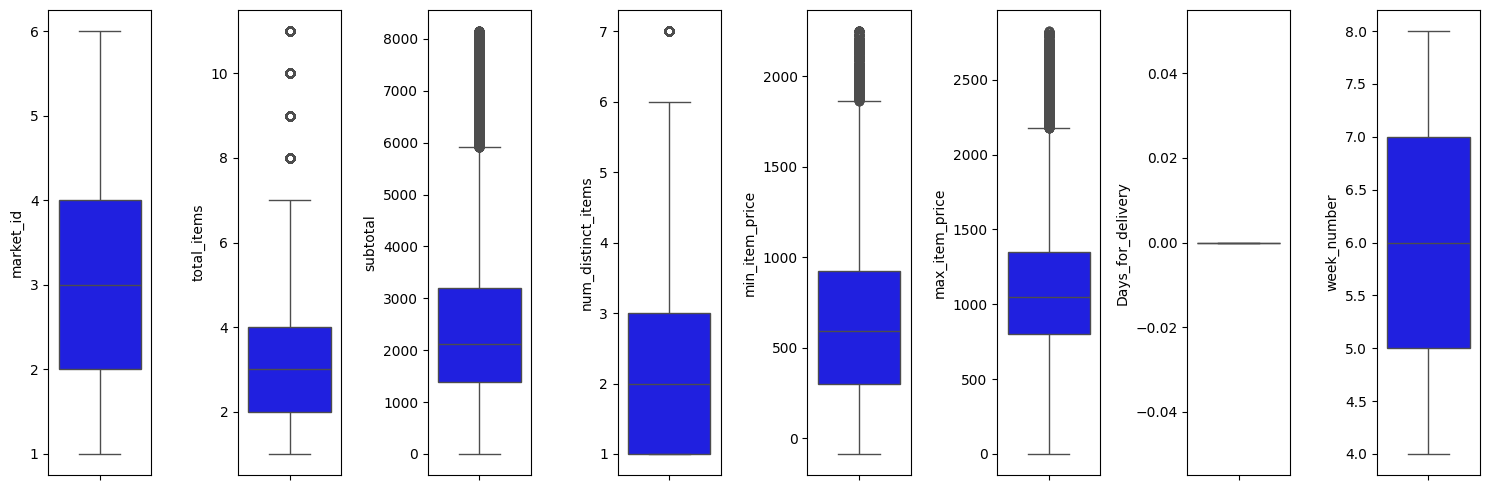

In [224]:
# removing outliers using zScore
cols = df_clean[['market_id','total_items','subtotal','num_distinct_items','min_item_price','max_item_price','Days_for_delivery','week_number']]
plt.figure(figsize=(15,5))
for i, col in enumerate(cols, 1):
    plt.subplot(1,8,i)
    sns.boxplot(y=df_clean[col], color='blue')
    
plt.tight_layout()
plt.show()

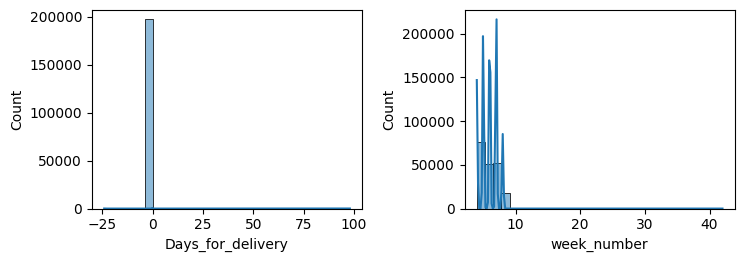

In [225]:
numerical_cols = df[['Days_for_delivery','week_number']]
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True, bins=30)
plt.tight_layout()
plt.show()

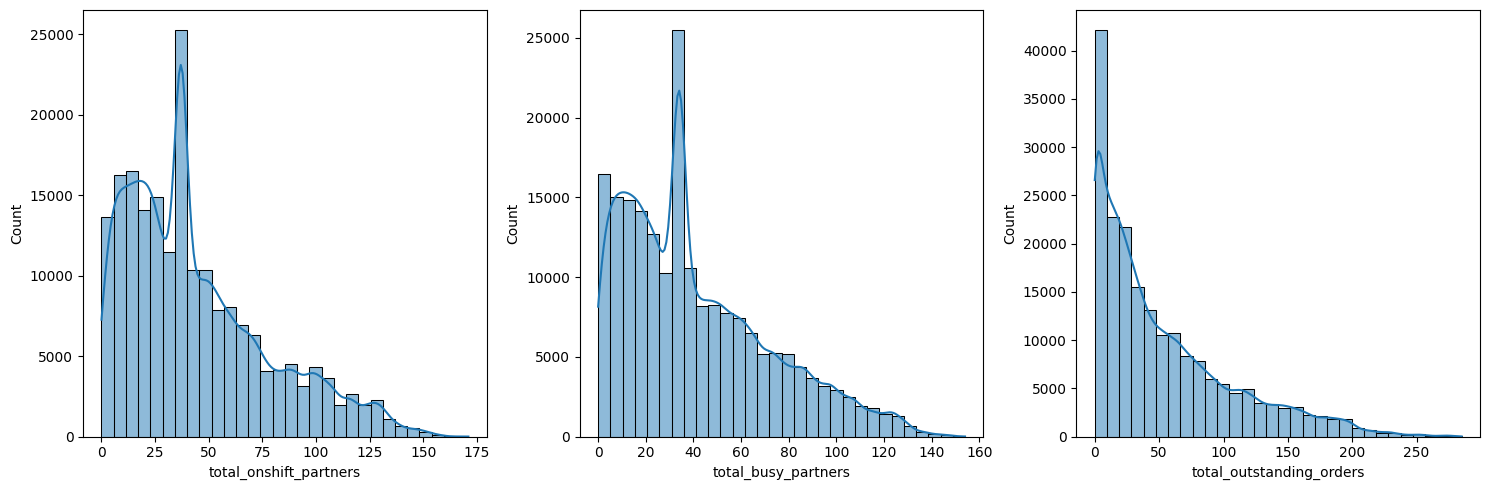

In [226]:
numerical_cols = df[['total_onshift_partners','total_busy_partners','total_outstanding_orders']]
plt.figure(figsize=(15,5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1,3,i+1)
    sns.histplot(df[col],kde=True, bins=30)
    # plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
# converting the above right skewed distribution to a normal distribution

df["total_onshift_partners"] = np.log(df["total_onshift_partners"].values)
df["total_busy_partners"] = np.log(df["total_busy_partners"].values)

df["total_outstanding_orders"] = np.log(df["total_outstanding_orders"].values)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20140\3953249824.py:1: RuntimeWarning: divide by zero encountered in log
  df["total_onshift_partners"] = np.log(df["total_onshift_partners"].values)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20140\3953249824.py:2: RuntimeWarning: divide by zero encountered in log
  df["total_busy_partners"] = np.log(df["total_busy_partners"].values)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20140\3953249824.py:3: RuntimeWarning: divide by zero encountered in log
  df["total_outstanding_orders"] = np.log(df["total_outstanding_orders"].values)


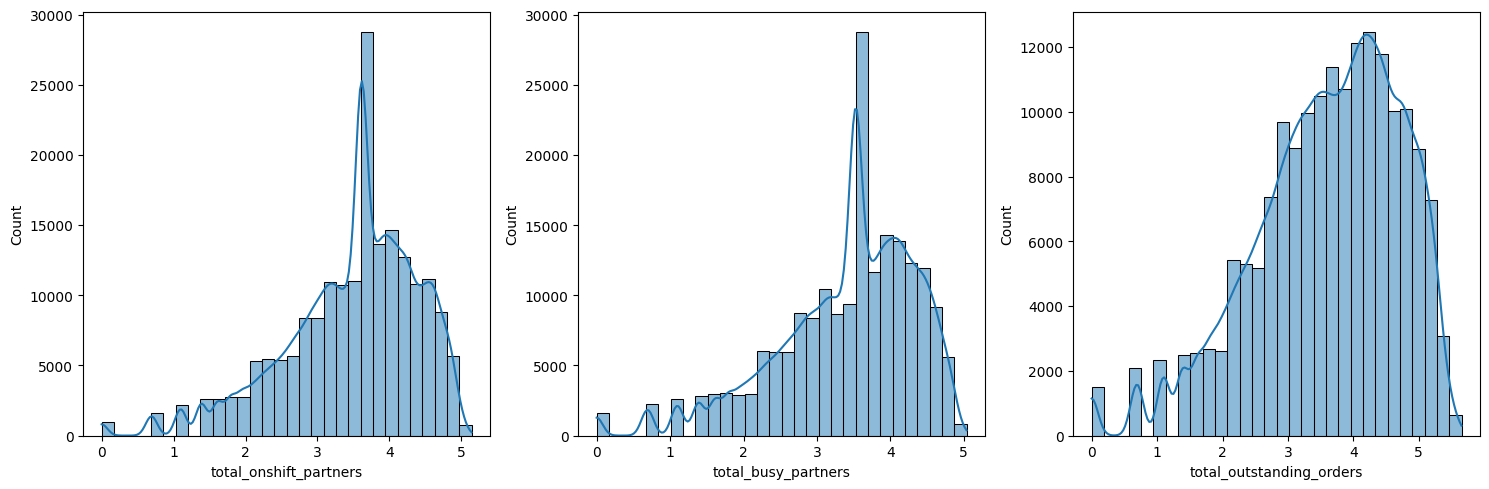

In [ ]:
# resulting graphs after normalization
numerical_cols = df[['total_onshift_partners','total_busy_partners','total_outstanding_orders']]
plt.figure(figsize=(15,5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1,3,i+1)
    sns.histplot(df[col],kde=True, bins=30)
    # plt.title(col)
plt.tight_layout()
plt.show()

In [230]:
df_clean.shape

(183480, 19)

Successfully removed all nulls of data with dropping of minimal data<br>
Org Shape of dataframe (197428, 14) <br>
Final Shape of dataframe (183480, 19)

### Summary Statistics Insights<br>
#### Date of Delivery <br>
- most of the orders have items between 1-25 items per order. very minute percentage orders have items increasing 25.
- most of the orders are delivered on the same day, however the range varies from -25 till 100 days (errorneous outliers)<br>
- from the year wise pov, the orders are concerntrated in begining of year till week 10. very few of them are seen across the year

In [231]:
df_clean.to_csv("porter clean data.csv", index=False)